# Upward inference
In this jupyter notebook we will show simple example upward inference in Logical Neural Networks (LNN).

## Model definition
Before we introduce upward inference we will define our model, predicates and axioms which will be later used for infering.

We will try to model simple geometry example. Lets have two squares $s1$ and $s2$. Since we know, that *square is also a rectangle*, we should be able to infer that these two squares are also a rectangles.

In [99]:
from lnn import Model

# create empty model
model = Model()

In [100]:
from lnn import Predicate

# define our two predicates (with arity 1 - which is default) and name them accordingly
# represents that object is a square
square = Predicate(name="square")
# represents that object is a rectangle
rectangle = Predicate(name="rectangle")

# add predicates to the model
model.add_formulae(square, rectangle)

Our axiom can be easily represented in first order login as following formula:

$square(x)\implies rectangle(x)$.

In [101]:
from lnn import Variable, Implies, World

# variable is needed for defining axiom in form of "square is also a rectangle"
x = Variable("x")

# define our axiom
square_is_rect = Implies(square(x), rectangle(x), name="square_is_rect", world=World.AXIOM)

# add axiom to the model
model.add_formulae(square_is_rect)

Now, we can check if our model contains all required predicates and axioms. Since model can be expressed as graph which represents syntax tree of our formula we can simply plot it and verify the graph edges.

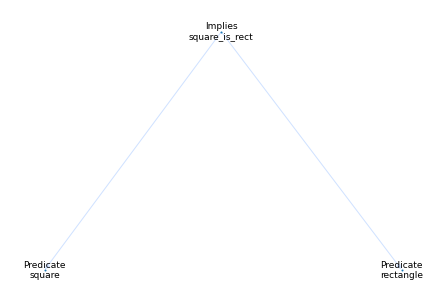

In [102]:
from lnn.utils import plot_graph

plot_graph(model)

Model can be also simply printed.

Do not be confused with variable `x0` it was created automatically for us. The variable `x` was created by us before.

In [103]:
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: square_is_rect(x) 

OPEN   Predicate: rectangle(x0) 

OPEN   Predicate: square(x0) 

***************************************************************************


## Adding facts

Before inference itself, since we will do so called *grounded inference*, we add so called *facts* which will be used in the upward inference.

Remember that we mentioned two squares in the introduction, just add them to the model as facts for $square$ predicate.

In [104]:
from lnn import Fact

# add facts to our model
model.add_facts(
    {
        # note that name "square" have to match name of the predicate
        "square":
        # names of the squares s1 and s2 are arbitraty
        # Fact.TRUE are bounds [1, 1] which represents that s1 and s2 are squares in truth value 1.0
        {"s1": Fact.TRUE, "s2": Fact.TRUE}
    }
)


We can verify the model by printing it again. We can see recently added facts as $square(s1)$ and $square(s2)$ being `TRUE`.

In [105]:
# note truth bounds on the right side of the table
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: square_is_rect(x) 

OPEN   Predicate: rectangle(x0) 

OPEN   Predicate: square(x0) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

***************************************************************************


## Inference
Now we have everything ready for so called *upward inference*. The "upward" in the name comes from the direction in which inference go through syntax tree of the formula.

In our case, we will start from atoms (two predicates in our case) and compute truth bounds for each subformula (implication in our case).

In [106]:
from lnn import Direction

# perform inference
steps, facts_inferred = model.infer(direction=Direction.UPWARD)

# result of the inference can be checked, we will see that inference happened in single step and zero facts were inferred
steps, facts_inferred

(1, tensor(0., grad_fn=<AddBackward0>))

The interesting part begins during inspection of our model.

We can see two interesting changes:
1. truth bounds for formulae $square\_is\_rect(s1)$ and $square\_is\_rect(s2)$ are both `TRUE`
2. truth bounds for predicate $rectangle(s1)$ and $rectangle(s2)$ are both `UNKNOWN`

Note that second is expected since we used only upward inference (evaluate the implication for $s1$ and $s2$). To tight these two bounds we have to use so called *downward inference* which is described in the next jupyter notebook.

In [107]:
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: square_is_rect(x) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

OPEN   Predicate: rectangle(x0) 
's2'                                                     UNKNOWN (0.0, 1.0)
's1'                                                     UNKNOWN (0.0, 1.0)

OPEN   Predicate: square(x0) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

***************************************************************************


## Extending our example

Feeling curious? Since LNN are modular, we can simply extend our model by new formulae and facts.

We will add a rectangle $r1$, new predicate $parallelogram$ with one parallelogram called $p1$ and axiom which states that rectangle is parallelogram.

In [108]:
# create new predicate for parallelogram
parallelogram = Predicate(name="parallelogram")

# create axiom which says "rectangle is parallelogram"
rectangle_is_parallelogram = Implies(rectangle(x), parallelogram(x), name="rectangle_is_parallelogram", world=World.AXIOM)

# add everything to the model, see that we do not have to recreate it
model.add_formulae(parallelogram, rectangle_is_parallelogram)

In [109]:
# add fact for rectangle and parallelogram predicate
model.add_facts({"rectangle": {"r1": Fact.TRUE}, "parallelogram": {"p1": Fact.TRUE}})


Now we can inspect our model by printing a description and plotting an graph.

In [110]:
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: rectangle_is_parallelogram(x) 

OPEN   Predicate: parallelogram(x0) 
'p1'                                                        TRUE (1.0, 1.0)

AXIOM  Implies: square_is_rect(x) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

OPEN   Predicate: rectangle(x0) 
's2'                                                     UNKNOWN (0.0, 1.0)
's1'                                                     UNKNOWN (0.0, 1.0)
'r1'                                                        TRUE (1.0, 1.0)

OPEN   Predicate: square(x0) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

***************************************************************************


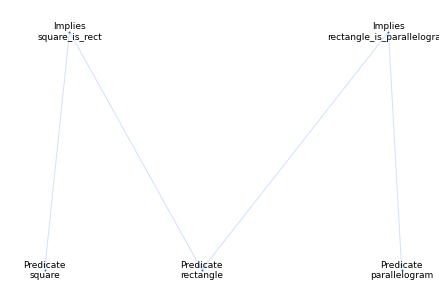

In [111]:
plot_graph(model)

And now we can run upward inference again and see the result.

In [112]:
# perform inference
steps, facts_inferred = model.infer(direction=Direction.UPWARD)

# result of the inference can be checked, we will see that inference happened in single step and zero facts were inferred
steps, facts_inferred

(1, tensor(0., grad_fn=<AddBackward0>))

In [113]:
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: rectangle_is_parallelogram(x) 
'p1'                                                        TRUE (1.0, 1.0)
'r1'                                                        TRUE (1.0, 1.0)
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)

OPEN   Predicate: parallelogram(x0) 
'p1'                                                        TRUE (1.0, 1.0)
'r1'                                                     UNKNOWN (0.0, 1.0)
's2'                                                     UNKNOWN (0.0, 1.0)
's1'                                                     UNKNOWN (0.0, 1.0)

AXIOM  Implies: square_is_rect(x) 
's2'                                                        TRUE (1.0, 1.0)
's1'                                                        TRUE (1.0, 1.0)